In [1]:
import sys
import pickle
from scipy import signal
from scipy import stats
import numpy as np
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import cohen_kappa_score

import math
from collections import OrderedDict


import matplotlib.pyplot as plt

sys.path.append('D:\Diamond\code')
from csp_james_2 import *

sys.path.append('D:\Diamond\code')
from thesis_funcs_19_03 import *


import csv
import datetime
import scipy


In [9]:
#covs_root = 'E:\\Diamond\\bci_iv\\MODELS\\fbcsp_mibif_cnn\\2a\\CURRENT\\tl_comp_csp_kld\\'
kld_root = 'E:\\Diamond\\bci_iv\\MODELS\\fbcsp_mibif_cnn\\2a\\CURRENT\\tl_comp_csp_mi\\'

portion_train = 0.7

MOST_SIM_FB = []
MOST_SIM_COVR = []
MOST_SIM_AVE = []
AVE_FB_C_OVR = []

for t_sub in range (1, 10):

    #t_covs = pickle.load(open(covs_root + 'A0' + str(t_sub) + '\\4s\\Covs.pickle', 'rb'))
    #s_sub = pickle.load(open(covs_root + 'A0' + str(s_sub) + '\\4s\\Covs.pickle', 'rb'))

    #store klds for each source subjects, each class and each filter bank
    kld_rec = np.zeros((9, 4, 9)) #9 subjects(including itself, except its not updated(kld = always 0)), 4 classes, 9 filters

    #read in logged klds
    t_kld_file = open(kld_root + 'A0' + str(t_sub) + '\\4s\\' + 'pt_' + str(int(portion_train *100)) + '\\MI_score_vals.txt', 'r')
    t_kld_log= t_kld_file.readlines()
    t_kld_file.close()

    for line in t_kld_log:
        if line.split(',')[0].strip() == 'sub':
            s_sub = int(line.split(',')[1].strip()) - 1 # -1 for python index
            c_ovr = int(line.split(',')[5].strip())
            fb = int(line.split(',')[7].strip())
            kld = float(line.split(',')[9].strip())
            kld_rec[s_sub, c_ovr, fb] += kld

    kld_rec = kld_rec/10

    ####################################################################################################################################
    ave_c_ovr = np.average(kld_rec, axis = 1) #average by c_ovr, so we are investigating fb similarity
    ave_fb = np.average(kld_rec, axis = -1) #average by fb, so we are investigating c_ovr similarity
    ave_fb_c_ovr = np.average(ave_fb, axis = -1)


    # for each fb, which s_sub's fb is t_sub's fb most similar to?
    Most_sim_fb = [] #t_sub's fb is most similar to Most_sim_fb[fb][0](s_sub)'s fb, whcih is Most_sim_fb[fb][1](kl_d)
    for fb in range (0,9):
        most_sim_fb = [np.argsort(ave_c_ovr[:,fb])[1], ave_c_ovr[:,fb][np.argsort(ave_c_ovr[:,fb])[1]]]
        Most_sim_fb.append(most_sim_fb)


    Most_sim_c_ovr = [] #t_sub's c_ovr is most similar to Most_sim_c_ovr[c_ovr][0](s_sub)'s v_ovr, whcih is Most_sim_v_ovr[v_ovr][1](kl_d)
    for c_ovr in range (0,4):
        most_sim_c_ovr = [np.argsort(ave_fb[:,c_ovr])[1], ave_fb[:,c_ovr][np.argsort(ave_fb[:,c_ovr])[1]]]
        Most_sim_c_ovr.append(most_sim_c_ovr)


    #print ('ave_sim_fb', Most_sim_fb)
    #print ('ave_sim_covr', Most_sim_c_ovr)

    
    MOST_SIM_FB.append(Most_sim_fb)
    MOST_SIM_COVR.append(Most_sim_c_ovr)
    MOST_SIM_AVE.append([np.argsort(ave_fb_c_ovr)[-1], ave_fb_c_ovr[np.argsort(ave_fb_c_ovr)[-1]]])
    AVE_FB_C_OVR.append(ave_fb_c_ovr)
    print ('ave_sim: t_sub_' + str(t_sub-1) + ' ms_sub_'+ str(np.argsort(ave_fb_c_ovr)[1]), ave_fb_c_ovr[np.argsort(ave_fb_c_ovr)[1]])

ave_sim: t_sub_0 ms_sub_5 -59.281020129381076
ave_sim: t_sub_1 ms_sub_8 -58.779075710147225
ave_sim: t_sub_2 ms_sub_5 -58.584764796067454
ave_sim: t_sub_3 ms_sub_2 -57.64831428139993
ave_sim: t_sub_4 ms_sub_1 -57.56851453603273
ave_sim: t_sub_5 ms_sub_7 -47.73800899035611
ave_sim: t_sub_6 ms_sub_5 -58.39930725704126
ave_sim: t_sub_7 ms_sub_1 -56.66137525911323
ave_sim: t_sub_8 ms_sub_5 -51.05417242430076


In [159]:
np.array(MOST_SIM_AVE)[:,0]+1

array([9., 9., 9., 9., 9., 9., 2., 9., 2.])

In [137]:
np.argsort(ave_fb[:,c_ovr])

array([8, 6, 0, 3, 5, 7, 2, 4, 1], dtype=int64)

In [136]:
ave_fb[:,c_ovr]

array([ 5.062944  , 11.89334175,  8.13108184,  5.62810922,  8.63424944,
        7.10555327,  4.67442028,  7.10558741,  0.        ])

In [163]:
AVE_FB_C_OVR

[array([0.        , 7.94135182, 4.46782787, 3.47212931, 3.37850563,
        6.06389336, 4.91253054, 4.30164195, 9.23346988]),
 array([ 7.35776586,  0.        ,  5.90900629,  7.16925998,  5.56470333,
        13.20822441,  9.69779338,  7.23138423, 18.97118656]),
 array([11.53243998,  3.91221842,  0.        , 16.59309268,  8.51636116,
        23.14586206, 31.31678443,  4.70767824, 45.81192184]),
 array([ 4.49347369,  7.72683387,  6.22881166,  0.        ,  3.58715416,
         6.07524758,  6.72511803,  5.39622982, 11.40011095]),
 array([ 4.47564878,  6.96843943,  5.35742539,  5.07972092,  0.        ,
        11.89397437,  8.51070074,  5.46853832, 15.07835465]),
 array([2.99223399, 7.81548457, 4.15158648, 3.61665183, 3.61439892,
        0.        , 5.75370153, 4.83465834, 7.86686476]),
 array([3.04755048, 9.79897015, 6.18295603, 3.0943784 , 4.84226575,
        4.99826099, 0.        , 6.54991388, 4.90461936]),
 array([ 9.2877656 ,  5.1412389 ,  6.4633275 ,  9.54357806,  7.72863068,
        2

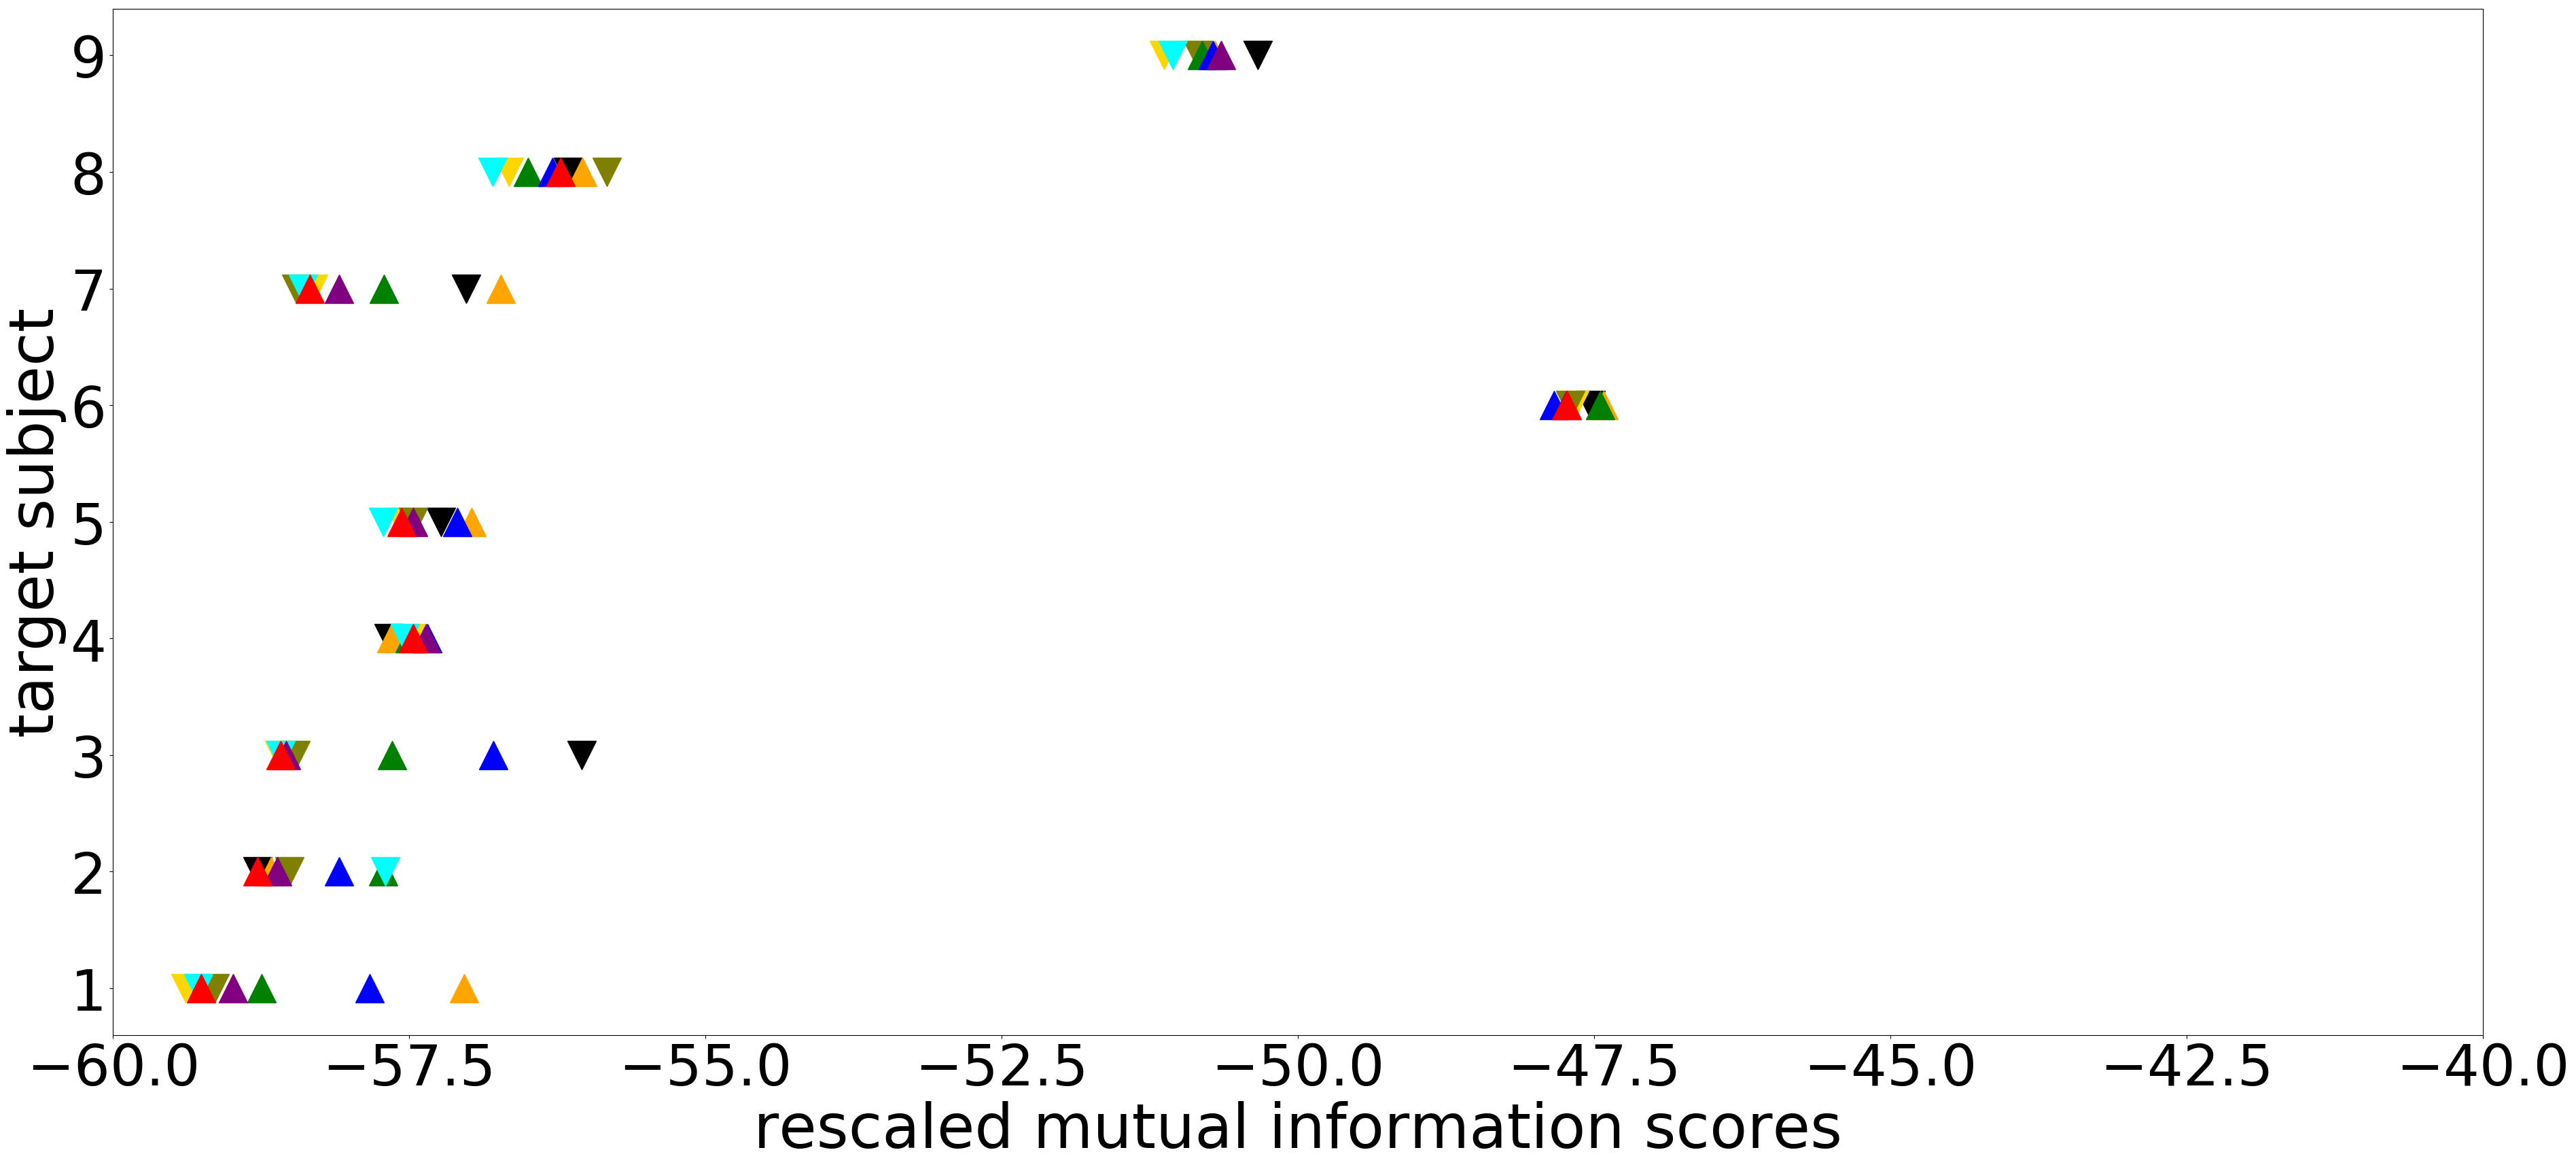

In [12]:
sub_colors = ['black', 'gold', 'orange', 'olive', 'green', 'cyan', 'blue', 'purple', 'red']
sex_colors = ['pink', 'pink', 'blue', 'pink', 'blue', 'pink', 'blue', 'blue', 'blue']
sex_markers = ['v', 'v', '^', 'v', '^', 'v', '^', '^', '^']
plt.figure(figsize=(45,20), dpi = 100)
for sub in range (0, 9):
    for i in range (0,9):
        plt.plot(AVE_FB_C_OVR[sub][i],sub+1,   color = sub_colors[i], marker = sex_markers[i], markersize='30')
        plt.axis('auto')
        plt.yticks(fontsize=60)
        plt.xticks(fontsize=60)
        plt.xlabel('rescaled mutual information scores', fontsize = '65')
        plt.ylabel('target subject', fontsize = '65')
        plt.xlim(-60, -40)

#plt.savefig('D:\\Diamond\\pics\\current_results\\tl\\KLD\\mi.png', dpi = 800)    
plt.show()

In [223]:
AVE_FB_C_OVR[sub]

array([2.99223399, 7.81548457, 4.15158648, 3.61665183, 3.61439892,
       0.        , 5.75370153, 4.83465834, 7.86686476])

In [166]:
AVE_FB_C_OVR[0]

array([0.        , 7.94135182, 4.46782787, 3.47212931, 3.37850563,
       6.06389336, 4.91253054, 4.30164195, 9.23346988])

# WHO'S WHO

In [125]:
dir_raw_data = 'E:\\Diamond\\bci_iv\\DATA\\2a\\matlab_raw\\'
GENDER_AGE = []
for subject in range (1,10):
    for ses in ['T']:
        sub = 'A0' + str(subject) + ses
        fileroot = dir_raw_data + sub + '.mat'

        raw_mat_data = scipy.io.loadmat(fileroot)['data']
        gender_age = [raw_mat_data[0][0][0][0][6][0], int(raw_mat_data[0][0][0][0][7][0])]
        GENDER_AGE.append(gender_age)

In [130]:
int(raw_mat_data[0][3][0][0][7][0])

17

In [126]:
GENDER_AGE

[['female', 22],
 ['female', 24],
 ['male', 26],
 ['female', 24],
 ['male', 24],
 ['female', 23],
 ['male', 25],
 ['male', 23],
 ['male', 17]]